In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("Mnist data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting Mnist data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting Mnist data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting Mnist data/t10k-images-idx3-ubyte.gz
Extracting Mnist data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [19]:
tf.reset_default_graph()

In [20]:
n_features = 28*28
n_hidden1 = 500
n_hidden2 = 150
n_coding = 20
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_features
learning_rate = 0.001

In [21]:
X = tf.placeholder(shape=[None, n_features], dtype = tf.float32, name = 'X')
y = tf.placeholder(shape=[None, n_features], dtype = tf.float32, name = 'y')

In [22]:
from functools import partial
initializer = tf.contrib.layers.variance_scaling_initializer()
create_dense = partial(tf.layers.dense, activation = tf.nn.elu, kernel_initializer = initializer)

In [23]:
hidden1 = create_dense(inputs = X, units = n_hidden1)
hidden2 = create_dense(inputs = hidden1, units = n_hidden2)
codings_mean = create_dense(inputs = hidden2, units = n_coding, activation = None)
codings_gamma = create_dense(inputs = hidden2, units = n_coding, activation = None)
sampling = tf.random_normal(dtype=tf.float32,shape = tf.shape(codings_gamma))
codings = codings_mean + tf.exp(0.5*codings_gamma)*sampling
hidden4 = create_dense(inputs = codings, units = n_hidden4)
hidden5 = create_dense(inputs = hidden4, units = n_hidden5)
logits = create_dense(inputs = hidden5, activation = None, units = n_outputs)
outputs = tf.nn.sigmoid(logits)

In [24]:
latent_loss = 0.5 * tf.reduce_sum(tf.square(codings_mean) + tf.exp(codings_gamma)- (1 + codings_gamma))

In [25]:
reconstruction_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits , labels=y))

In [26]:
loss = latent_loss + reconstruction_loss

In [27]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [28]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [29]:
iterations = 100
batch_per_iterations = 1000
batch_size = 64

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

Reconstruction loss: 5549.9443


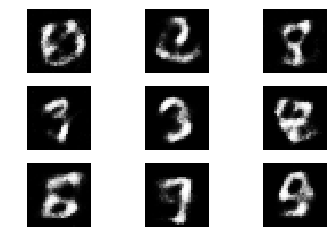

Reconstruction loss: 5091.803


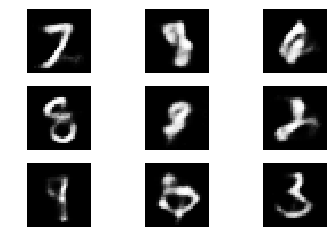

Reconstruction loss: 4912.176


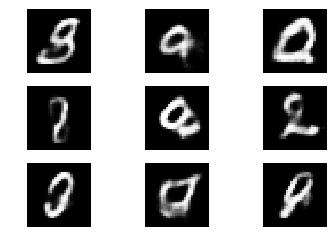

Reconstruction loss: 4834.097


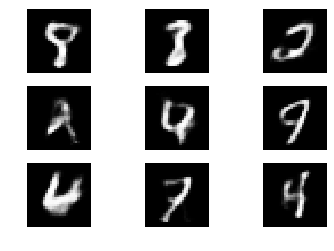

Reconstruction loss: 4397.285


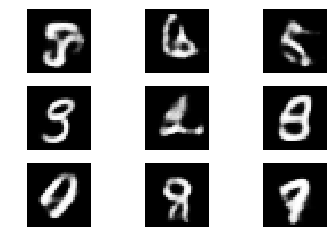

Reconstruction loss: 4803.191


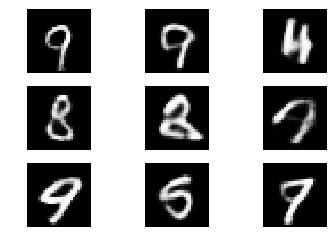

Reconstruction loss: 4782.584


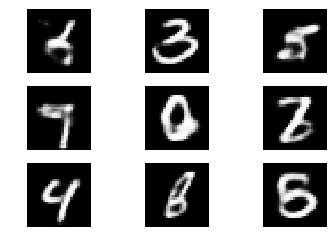

Reconstruction loss: 4568.971


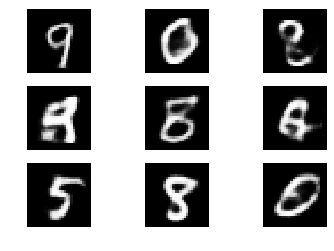

Reconstruction loss: 4618.4966


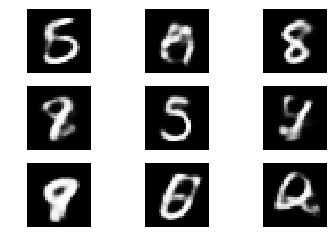

Reconstruction loss: 4366.659


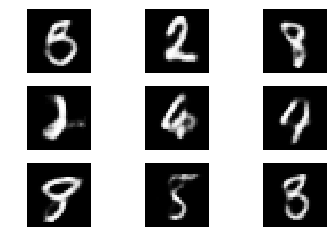

In [31]:
with tf.Session() as sess:
    sess.run(init)
    for it in range(iterations):
        for _ in range(batch_per_iterations):
            true_image, _ = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X:true_image, y:true_image})
        if it%10 == 0:
            generated_image = sess.run(outputs, feed_dict={codings:np.random.normal(size=[9, n_coding])})
            true_image, _ = mnist.train.next_batch(batch_size)
            print("Reconstruction loss:",sess.run(reconstruction_loss, feed_dict={X:true_image, y:true_image}))
            for i in range(9):
                plt.subplot(3,3,i+1)
                plt.imshow(generated_image[i].reshape((28,28)), cmap="gray")
                plt.axis("off")
            plt.show()
    saver.save(sess, "./model")